<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
      <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20251/Module%204-Clustering/3-selecting_hyperparameters.ipynb" target="_blank">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
        <a href="https://www.youtube.com/watch?v=DzrvLpxTxJw" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="Determine the right Number of Clusters | WSS | Elbow Method | Silhouette Score" style="height: 40px;">
    </a>
</div>

## **1. Model parameters** vs **hyperparameters** 

### **a. Model Parameters**
- **Definition**: Parameters are the values that the model **learns from the training data** during the training process.
- **Key Characteristics**:
  - They are **internal to the model** and adjusted automatically during training.
  - They directly influence the predictions or output of the model.
  - Their values depend on the training data and optimization process.
- **Examples**:
  - In a **Linear Regression** model:
    - The coefficients ($w$) and the intercept ($b$) are parameters.
  - In a **Neural Network**:
    - The weights and biases in each layer are parameters.
  - In **K-Means** clustering:
    - The **centroids** of the clusters are parameters.

### **b. Model Hyperparameters**
- **Definition**: Hyperparameters are **external settings** for the model that are **not learned from the data** but are set **before training** begins.
- **Key Characteristics**:
  - They are used to control the learning process or the structure of the model.
  - They are tuned **manually** (or via search methods like grid search) to optimize the model's performance.
  - Hyperparameters must be chosen carefully because they can significantly impact the model's ability to generalize.
- **Examples**:
  - In **K-Means** clustering:
    - The number of clusters ($k$) is a hyperparameter.
  - In **DBSCAN**:
    - Epsilon ($\epsilon$) and `min_samples` are hyperparameters.
  - In **Neural Networks**:
    - The `number of layers, number of neurons, learning rate, and batch size` are hyperparameters.
  - In **Decision Trees**:
    - Maximum tree depth (`max_depth`), minimum samples per split (`min_samples_split`), etc., are hyperparameters.

### **Summary: Key Differences**

| Feature               | Model Parameters                         | Hyperparameters                          |
|-----------------------|------------------------------------------|------------------------------------------|
| **Definition**        | Learned from the data during training    | Set manually before training             |
| **Adjustable?**       | Adjusted by the optimization algorithm   | Set by the user or via tuning techniques |
| **Examples**          | Weights in Neural Networks              | Learning rate, number of layers          |
| **Model Training**    | Updated during training                  | Remain fixed during training             |

---

### **2. Hyperparameters (Tunning/Selection) For K-Means Clustering Algorithm**
#### **Choosing the Right K For K-Means Clustering (The Elbow Method)**

One challenge with K-Means is selecting the appropriate number of clusters $ K $.<br>
We can try different cluster numbers and plot them and eye ball the goodness of the created clusters.<br>
For example, in the image below, we can notice that we started to create unclear clusters **starting from K = 4**.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/elbow_1.png" alt="Elbow Method" width="800"/>
</div>

The **Elbow Method** is a technique used to determine the optimal $ K $ by plotting the **within-cluster sum of squares (WCSS)** against different values of $ K $.<br>

**Steps of the Elbow Method**:
  1. Run K-Means for a range of $ K $ values.
  2. Plot the WCSS for each $ K $.
  3. Look for the "elbow" point in the plot, where the decrease in WCSS slows down. This is the ideal $ K $.

**The WCSS Formula (Within-Cluster Sum of Squares)**

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

**Explanation**

* $k$: Number of clusters
* $C_i$: The set of points in cluster $i$
* $x$: A data point in cluster $C_i$
* $\mu_i$: The centroid (mean) of cluster $C_i$
* $\| x - \mu_i \|^2$: Squared Euclidean distance between the point and the cluster centroid

This formula calculates the sum of the squared distances between each point and the centroid of its assigned cluster, and is used to evaluate the compactness of clusters in algorithms like **K-Means**.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/elbow_2.png" alt="Elbow Method" width="1200"/>
</div>

<div style="display: flex; justify-content: center; align-items: center; height: 100px;">
    <a href="https://youtu.be/QXOkPvFM6NU?si=r0ZihS7zqeSS2b2b&t=467" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="Elbow Method Youtube Video" style="height: 40px;">
    </a>
</div>

**Elbow Method in Python**

Import the Needed Python Libraries and Load the Dataset

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Get the data
df = pd.read_csv('https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/mall_customers.csv')
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

Implement the Elbow Method

In [5]:
# Use the kmeans.inertia_() method to compute the WCSS for each K setting

# Initialize a list to store the WCSS values
wcss = []

# Using the features "Annual Income (k$)" and "Spending Score (1-100)"
for k in range(1, 11):  # Testing cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)  # Fit on the selected features
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS


#### Display the Computed WCSS values for the Different K values

Notice how the distance is largest when K = 1 and how the difference in distance starts to shrink as K increases

In [6]:

# Sort WCSS values in descending order and round to 2 decimal places, then print
sorted_wcss = sorted(wcss, reverse=True) 
print("WCSS values for k from 1 to 10 (sorted, 2 decimal places):")
for i, w in enumerate(sorted_wcss, start=1):
    print(f"K={i}: {w:.2f}") # Formatted output with 2 decimal places
# Plot the WCSS values

WCSS values for k from 1 to 10 (sorted, 2 decimal places):
K=1: 269981.28
K=2: 183653.33
K=3: 106348.37
K=4: 73880.64
K=5: 44448.46
K=6: 40825.17
K=7: 33642.58
K=8: 26686.84
K=9: 24766.47
K=10: 23103.12


#### Plot the Elbow Graph

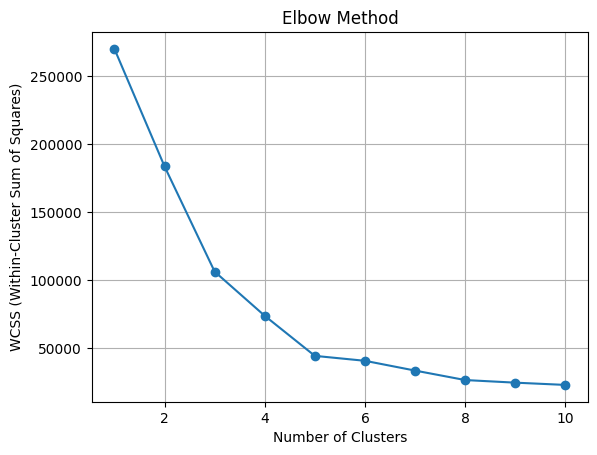

In [7]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

The elbow chart above illustrates the process of determining the optimal number of clusters for customer segmentation based on the features "Annual Income (k$)" and "Spending Score (1-100)." Key observations include:

- **Purpose:** The chart plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters to identify the point where adding more clusters does not significantly reduce WCSS.
- **Trend:** As the number of clusters increases, WCSS decreases due to better compactness within each cluster.
- **Elbow Point:** 
  - The "elbow" is observed at **4 or 5 clusters**, where the rate of decrease in WCSS slows down noticeably.
  - This indicates the optimal number of clusters, balancing simplicity and effectiveness.
- **Interpretation:** Selecting 4 or 5 clusters will likely result in meaningful segmentation of customers into distinct groups for analysis or targeted strategies.

#### **Validating Results**
After setting the $k$ number of clusters, we can validate the clustering using thye following methods:<br>
i. **Number of Clusters**: Check if the number of clusters is reasonable for your data.<br>

ii. **Visual Inspection**: Plot the clusters and noise points to ensure they align with the data's structure.<br>

iii. **Silhouette Score**: We can also use the $Silhouette\ Score$ which tells us how well each point fits into its cluster (see below at the end of this notebook).<br>

---

### **3. Hyperparameters (Tunning/Selection) For DBSCAN Algorithm**
Determining the **hyperparameters** for the **DBSCAN** algorithm, namely **epsilon ($\epsilon$)** and **minimum points (`min_samples`)**, can be challenging. 

However, there are systematic methods to estimate these values effectively before fine-tuning through trial and error.

### **a. Determining min_samples**
The **min_samples** parameter defines the minimum number of points (including the point itself) that must exist in a neighborhood of radius $\epsilon$ for the point to be considered a **core point**.

#### **Techniques to Estimate min_samples**
i. **Rule of Thumb**:<br>
   - Start with:
     $$
     \text{min\_samples} = \text{number of features} + 1
     $$
   - For example:
     - 2D data → `min_samples = 3`.
     - 3D data → `min_samples = 4`.

ii. **Domain Knowledge**:<br>
   - If you know the minimum density required for clusters, you can set `min_samples` accordingly.
   - Example: In customer segmentation, you might set `min_samples` to 5 or 10 to define a minimum cluster size.

iii. **Experimentation**:<br>
   - Run DBSCAN with a range of `min_samples` values (e.g., 3–10) and evaluate the resulting clusters visually or using metrics like the Silhouette Score.

#### **b. Determining Epsilon ($\epsilon$)**
The **epsilon** parameter defines the neighborhood radius around each point. Points within this radius are considered neighbors.

##### **Techniques to Estimate Epsilon**
i. **k-Distance Plot (k-NN Distance Plot)**:<br>
   - Compute the distances to the **k-th nearest neighbor** for all points (where k = min_samples).
   - Sort the distances in ascending order and plot them.
   - Look for the **"elbow point"** where the slope changes significantly. This is a good candidate for $\epsilon$.
   - The elbow point in the plot suggests the optimal $\epsilon$. 
   - If the plot lacks a clear elbow, test a range of values manually.

ii. **Domain Knowledge**:<br>
   - If you know the scale or spread of the data, you can estimate $\epsilon$ based on typical distances between points.
   - Example: In geographic data, $\epsilon$ could correspond to a known radius (e.g., kilometers).

iii. **Distance Metrics**:<br>
   - Inspect the pairwise distances between points to understand the average neighborhood radius.


....................................................................

**Example: KNN Distance Computation**

**Dataset:**

Suppose we have 5 points in 2D space:

| Point | Coordinates |
| ----- | ----------- |
| A     | (1, 2)      |
| B     | (2, 3)      |
| C     | (3, 3)      |
| D     | (6, 5)      |
| E     | (7, 8)      |

We want to compute the distance from each point to its **2nd nearest neighbor** (i.e., `k = 2`).

**Step 1: Compute Euclidean Distances**

Euclidean distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is:

$$
\text{Distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

Let’s compute pairwise distances:

|   | A    | B    | C    | D    | E    |
| - | ---- | ---- | ---- | ---- | ---- |
| A | 0    | 1.41 | 2.83 | 5.83 | 8.49 |
| B | 1.41 | 0    | 1.00 | 4.24 | 6.71 |
| C | 2.83 | 1.00 | 0    | 3.61 | 5.83 |
| D | 5.83 | 4.24 | 3.61 | 0    | 3.61 |
| E | 8.49 | 6.71 | 5.83 | 3.61 | 0    |

**Step 2: Find Distance to 2nd Nearest Neighbor**

(We ignore distance to itself, which is 0.)

| Point | Nearest Distances (sorted) | **2nd Nearest Distance** |
| ----- | -------------------------- | ------------------------ |
| A     | 1.41, 2.83, 5.83, 8.49     | **2.83**                 |
| B     | 1.00, 1.41, 4.24, 6.71     | **1.41**                 |
| C     | 1.00, 2.83, 3.61, 5.83     | **2.83**                 |
| D     | 3.61, 3.61, 4.24, 5.83     | **3.61**                 |
| E     | 3.61, 5.83, 6.71, 8.49     | **5.83**                 |

**Step 3: k-Distance Plot Points**

Sort the 2nd nearest distances:

```
Sorted 2nd NN Distances: [1.41, 2.83, 2.83, 3.61, 5.83]
```

You would **plot these distances** (y-axis) against point index (x-axis). The **elbow** in this plot suggests a good candidate for epsilon (ε) in DBSCAN.

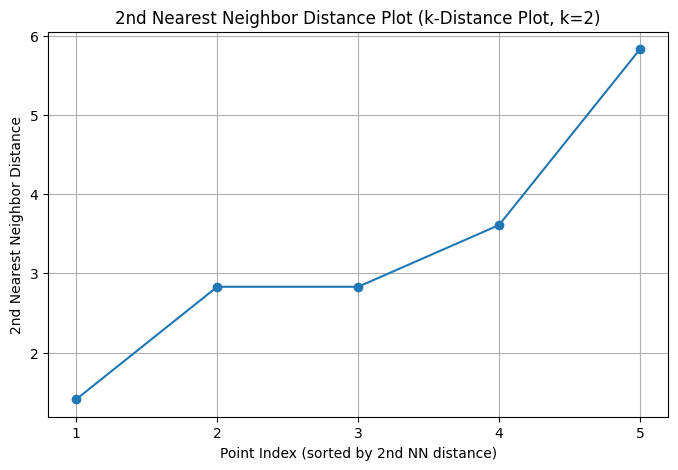

In [19]:
import matplotlib.pyplot as plt

# Sorted 2nd nearest neighbor distances
sorted_2nd_nn_distances = [1.41, 2.83, 2.83, 3.61, 5.83]

# X-axis: index of points (1-based for visualization)
x_values = list(range(1, len(sorted_2nd_nn_distances) + 1))

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, sorted_2nd_nn_distances, marker='o', linestyle='-')
plt.title("2nd Nearest Neighbor Distance Plot (k-Distance Plot, k=2)")
plt.xlabel("Point Index (sorted by 2nd NN distance)")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.grid(True)
plt.xticks(x_values)
plt.show()


The elbow in the plot around distance 3.61 suggests it might be a good choice for the ε parameter in DBSCAN. 

....................................................................

### **c. Combining $\epsilon$ and min_samples**
i. **Iterative Refinement**:<br>
   - Start with the **k-distance plot** to find an initial estimate for $\epsilon$ - We will use `min_samples = 3` or a value based on the number of features.
   - Run DBSCAN and evaluate the results.
   - Adjust $\epsilon$ and `min_samples` iteratively to fine-tune the clustering.

ii. **Visualization**:<br>
   - Visualize the clusters using scatter plots to ensure they align with expectations.
   - Points labeled as **-1 (noise)** should make sense intuitively.

### **d. Validation Metrics**
After selecting $\epsilon$ and `min_samples`, validate the clustering using metrics:<br>
i. **Number of Clusters**: Check if the number of clusters is reasonable for your data.<br>

ii. **Visual Inspection**: Plot the clusters and noise points to ensure they align with the data's structure.<br>

iii. **Silhouette Score**: We can also use the $Silhouette\ Score$ which tells us how well each point fits into its cluster (see below at the end of this notebook).<br>

....................................................................

### **Summary**
a. Use the **k-distance plot** to estimate $\epsilon$.<br>
b. Start with `min_samples = 3` (rule of thumb) or based on domain knowledge.<br>
c. Fine-tune $\epsilon$ and `min_samples` iteratively, evaluating results visually and using metrics like the Silhouette Score.<br>

....................................................................

#### **Practical Example for Identifying DBSCAN Distance in Python**
In this example, we will use the Mall Customers Dataset which we used in KMEANs clustering section and we will try to determine the initial hyperparameters using the methods discussed above.

##### Import the Libraries and the Data 
We will import mall customers data and select two features (Annual Income and Spending Score) and use them to create our clustersso as to make plotting easier for learning purposes.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


# Get the data
df = pd.read_csv('https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/mall_customers.csv')
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]

df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Compute distances to the k-th nearest neighbor

In [10]:
neighbors = NearestNeighbors(n_neighbors=3)  # Use min_samples = 3
neighbors_fit = neighbors.fit(df)
distances, _ = neighbors_fit.kneighbors(df)

#### Show the neighbors distances for the first 5 customer records

In [11]:
distances[:5,:]

array([[0.        , 2.23606798, 7.21110255],
       [0.        , 4.12310563, 5.38516481],
       [0.        , 2.        , 4.24264069],
       [0.        , 1.41421356, 4.        ],
       [0.        , 2.23606798, 6.40312424]])

#### Sort the distances to the k-th nearest neighbor

In [12]:
distances = np.sort(distances[:, 2])  # 3rd neighbor (0-based index)

#### Plot The Distances and Look for the Elbow

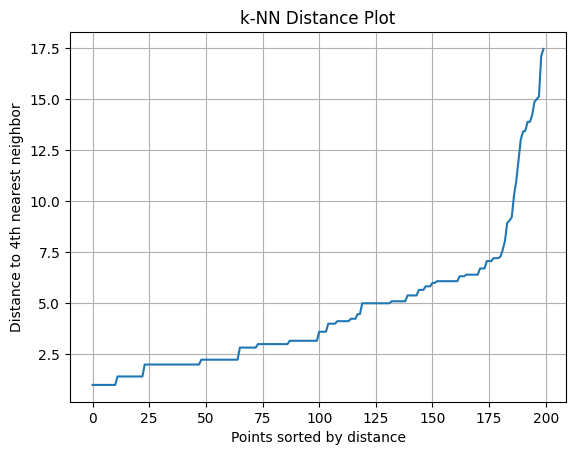

In [13]:
plt.plot(distances)
plt.title("k-NN Distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th nearest neighbor")
plt.grid()
plt.show()

##### Run DBSCAN using the Distance Value based on the previous Elbow Plot

In [14]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Run DBSCAN
epsilon = 7.5  # Based on the K-NN distance plot
min_samples = 3  # number of features + 1
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(features)

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# Print the number of clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {num_clusters}")

# Print the clusters counts
print(df['Cluster'].value_counts())

Number of clusters: 9
Cluster
 5    89
 6    32
 1    17
-1    14
 7    14
 8    12
 2     9
 0     7
 4     3
 3     3
Name: count, dtype: int64


Display the resulting Clusters

In [15]:
df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,0
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


Visualize the clustering results

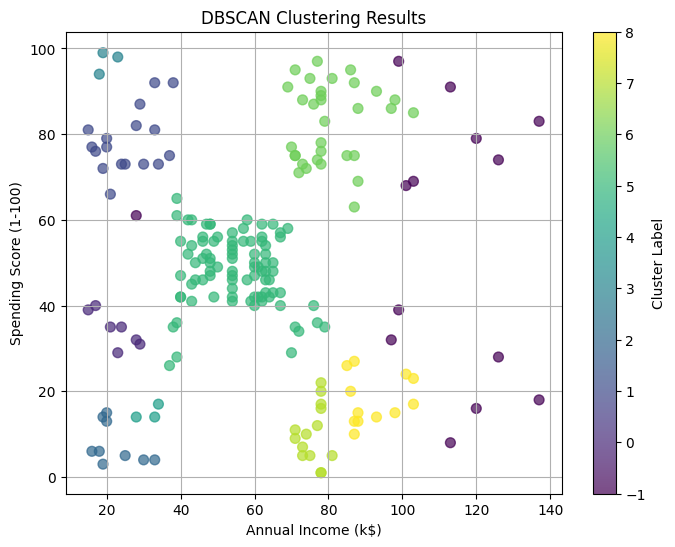

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster Label")
plt.grid()
plt.show()

#### Print summary
Print out the number of created clusters and the number of noise points.


In [17]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise label (-1)
print(f"Number of clusters (excluding noise): {num_clusters}")
print(f"Number of noise points: {list(labels).count(-1)}")

Number of clusters (excluding noise): 9
Number of noise points: 14


---

### Validate Clustering using the Silhouette Score


  The **silhouette score** is a metric used to evaluate the quality of clustering. It gives an idea of how similar a point is to its own cluster compared to other clusters.

### What is the silhouette measure?
- For each data point, the silhouette score measures two things:
  1. **Cohesion (a):** How close the point is to other points in its own cluster.
  2. **Separation (b):** How far the point is from points in the nearest other cluster.

- The silhouette score for a point is calculated as:
  $$
  s = \frac{b - a}{\max(a, b)}
  $$

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/silhouette_score.png" alt="Silhouette Score Visualization" width="600"/>
</div>

  where:
  - \( a \): Average distance to other points in the same cluster (within-cluster distance).
  - \( b \): Average distance to points in the nearest other cluster (nearest-cluster distance).

- The score ranges between:
  - **+1**: The point is very close to its own cluster and far from other clusters (well-clustered).
  - **0**: The point is on or near the boundary between two clusters.
  - **-1**: The point is closer to another cluster than its own (poorly clustered).

In [18]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
if len(set(labels)) > 1:  # Avoid silhouette score error for single cluster
    score = silhouette_score(features, labels)
    print(f"Silhouette Score: {score:.2f}")
else:
    print("Silhouette Score cannot be calculated for a single cluster.")

Silhouette Score: 0.41


Score = 0.36 — Is it Good?

A score of 0.36 is:

Moderate clustering quality.

It suggests that there is some structure, but the clusters may not be well-separated or clearly defined.

General Benchmarks:
- \> 0.7: Strong structure, well-separated clusters.
- 0.5 – 0.7: Reasonable structure.
- 0.25 – 0.5: Weak structure (yours falls here).
- < 0.25: Poor structure.

So, 0.36 is acceptable, especially if your data is complex or noisy, but there is likely room for improvement (e.g., tuning number of clusters, trying different features, or using another clustering algorithm).